In [1]:
# Vamos a realizar una prueba solo son la prediccion de latitudes
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.regularizers import l2
import sys
sys.path.append('../')
from Utils import utils_nn as utlnn


In [2]:
x_test = pd.read_excel("../Train_Test/Dataset_Separado/x_test_new.xlsx")
x_train = pd.read_excel("../Train_Test/Dataset_Separado/x_train_new.xlsx")
y_test = pd.read_excel("../Train_Test/Dataset_Separado/y_test_new.xlsx")
y_train = pd.read_excel("../Train_Test/Dataset_Separado/y_train_new.xlsx")

In [3]:
#Definimos el radio Ro = 6.371E6
R0= 6.371E6 # [m]

out_x_coord = [f'x_{i}' for i in range(1,101)]

y_train_x=y_train[out_x_coord]/R0
y_test_x = y_test[out_x_coord]/R0

# Nota: 'y_test_x' posee 1026 lineas con [x_1 ... x_100] columnas

In [4]:
# epoch = 1200
# b_s = 70

# while epoch <= 1500:
#   while b_s <= 130:
#     l2_reg = 0.00
#     inputs = Input(shape=(9,))
#     encoded = Dense(9, activation='relu',kernel_regularizer=l2(l2_reg))(inputs)  # Compresión 8 V3 16 n 
#     encoded = Dense(16, activation='relu',kernel_regularizer=l2(l2_reg))(encoded)
#     encoded = Dense(32, activation='relu',kernel_regularizer=l2(l2_reg))(encoded)
#     encoded = Dense(64, activation = 'relu',kernel_regularizer=l2(l2_reg))(encoded)
#     encoded = Dense(80, activation = 'relu',kernel_regularizer=l2(l2_reg))(encoded)
#     encoded = Dense(90, activation = 'relu',kernel_regularizer=l2(l2_reg))(encoded)
#     decoded = Dense(100, activation='linear',kernel_regularizer=l2(l2_reg), name = 'x_output')(encoded)  # Reconstrucción a 100 puntos
#     autoencoder_x = Model(inputs, decoded)
#     autoencoder_x.compile(optimizer = 'adam', loss='mse')
#     autoencoder_x.summary()

#     history = autoencoder_x.fit(x_train,y_train_x,
#                           epochs = epoch,
#                           batch_size = b_s, 
#                           validation_split = 0.1)

#     loss = autoencoder_x.evaluate(x_test, y_test_x)
    
#     if loss <= 35:
#       autoencoder_x.save(f'../modelos_entrenamiento/modelos_x/mod_x_{epoch}_{b_s}_vs10_Adam_loss_{round(loss)}.keras')
#     print(f'Pérdida en datos de Test: {loss} epoch: {epoch}, batch_size: {b_s}')
#     b_s += 20  
#   b_s = 80
#   epoch +=40

In [43]:

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Nadam
from tensorflow.keras.optimizers import SGD
# from tensorflow.keras.optimizers import AdamW

l2_reg = 0.000 #0.0001
inputs = Input(shape=(9,))

encoded = Dense(9, activation='relu',kernel_regularizer=l2(l2_reg))(inputs)  # Compresión 8 V3 16 n 
encoded = Dense(16, activation='relu',kernel_regularizer=l2(l2_reg))(encoded) #V3
encoded = Dense(32, activation='relu',kernel_regularizer=l2(l2_reg))(encoded)
encoded = Dense(64, activation = 'relu',kernel_regularizer=l2(l2_reg))(encoded)
encoded = Dense(80, activation = 'relu',kernel_regularizer=l2(l2_reg))(encoded)
encoded = Dense(90, activation = 'relu',kernel_regularizer=l2(l2_reg))(encoded)
# encoded = Dense(100, activation = 'relu',kernel_regularizer=l2(l2_reg))(encoded)

decoded = Dense(100, activation='linear',kernel_regularizer=l2(l2_reg), name = 'x_output')(encoded)  # Reconstrucción a 100 puntos

# Definición del modelo
autoencoder_x = Model(inputs, decoded)

#Definicion del optimizador
# optimizer = RMSprop(learning_rate = 1e-3, rho=0.9)
optimizer = Nadam(learning_rate = 1e-3)
#optimizer = SGD(learning_rate=1e-3, momentum=0.9,nesterov=True) # Este no hace nada basicamente tira una unica curva para todo parece ser
# optimizer = AdamW(learning_rate=1e-4, weight_decay=1e-2)

autoencoder_x.compile(optimizer = optimizer, loss='mse', metrics = ['mae']) #, metrics=['mae']

autoencoder_x.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)      │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_36 (Dense)                │ (None, 9)              │            90 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_37 (Dense)                │ (None, 16)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 32)             │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 80)             │         5,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 90)             │         7,290 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ x_output (Dense)                │ (None, 100)            │         9,100 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,496 (95.69 KB)

 Trainable params: 24,496 (95.69 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
early_stopping = tf.keras.callbacks.EarlyStopping(
  monitor = 'val_loss',	#monitoriamos la pérdida en validación
  patience = 30, # Si no mejora en 10->20 epochs, detenemos el entrenamiento.
  restore_best_weights = True # Restaura los mejores pesos encontrados.
)

history = autoencoder_x.fit(x_train,y_train_x,
                          epochs = 400, #300
                          batch_size = 32, #32
                          validation_split = 0.1,
                           callbacks=[early_stopping]
                          )

Epoch 1/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 1222.3330 - mae: 16.3173 - val_loss: 0.5370 - val_mae: 0.4930
Epoch 2/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3478 - mae: 0.3969 - val_loss: 0.1329 - val_mae: 0.2583
Epoch 3/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1152 - mae: 0.2338 - val_loss: 0.0775 - val_mae: 0.1948
Epoch 4/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0740 - mae: 0.1915 - val_loss: 0.0575 - val_mae: 0.1703
Epoch 5/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0583 - mae: 0.1748 - val_loss: 0.0620 - val_mae: 0.1842
Epoch 6/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0511 - mae: 0.1674 - val_loss: 0.0598 - val_mae: 0.1846
Epoch 7/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0472 - mae: 0.1634 - val_loss: 0.0566 - val_mae: 0.1842
Epoch 8/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0399 - mae: 0.1511 - val_loss: 0.0394 - val_mae: 0.1525
Epoch 9/400
116/116 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [45]:
loss = autoencoder_x.evaluate(x_test, y_test_x)
print(f'Pérdida en datos de Test: {loss}')

# nota: 0.00032 
# [0.003203689120709896, 0.032577596604824066]
# [0.0031841585878282785, 0.031963370740413666]
# [0.00023003153910394758, 0.008729767054319382] Esto me muestra sin L2(0.0)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.4224e-04 - mae: 0.0073 
Pérdida en datos de Test: [0.00014231886598281562, 0.0071639069356024265]


In [ ]:
mae_in_m = loss[1]*R0
print(f'mae:{mae_in_m}[m]')

mae:45641.25108672306[m]


In [70]:
idx = 3

# print(x_test.iloc[idx])
 # Elegir una muestra para comparar (observar luego la muestra 30)

# Predicción de una muestra 
y_pred = autoencoder_x.predict(np.expand_dims(x_test.iloc[idx], axis=0))
###############################################
y_true = y_test_x.iloc[idx] # Se obtine Algo de tipo Serie
y_true=y_true.to_numpy() # Transform a Numpy array
y_pred = y_pred.flatten() # [[...,...,...,....,]]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


luego ver las graficas de la num 70

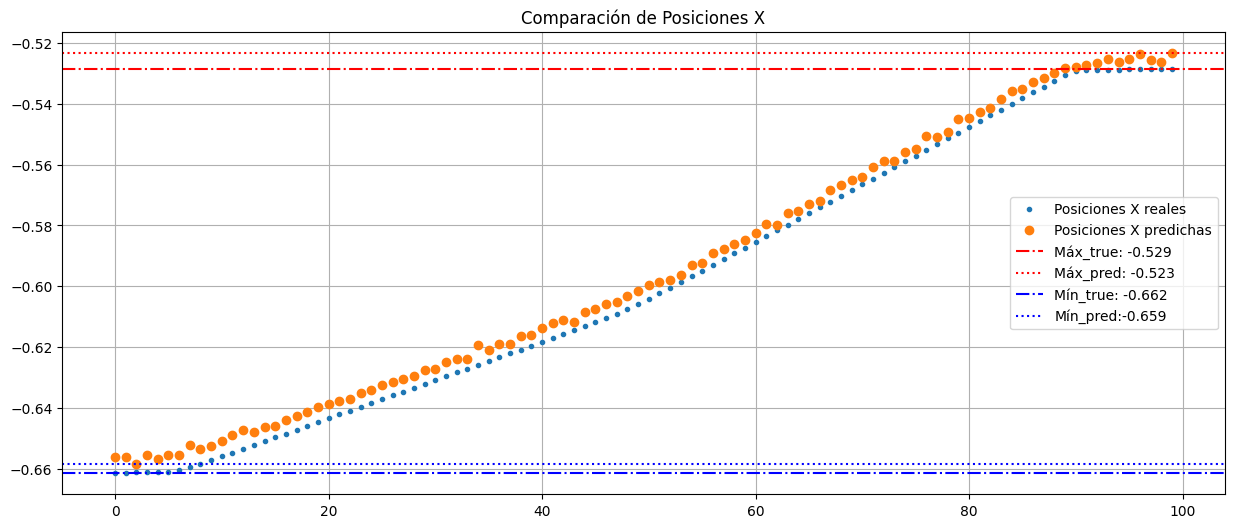

In [71]:
##Graficamos 
# Buscamos los máximos y mínimos 
y_true_max = np.max(y_true)
y_true_min = np.min(y_true)

y_pred_max = np.max(y_pred)
y_pred_min = np.min(y_pred)

# Pos x
plt.figure(figsize=(15, 6))
plt.plot(y_true, label='Posiciones X reales', linestyle='None', marker='.')
plt.plot(y_pred, label='Posiciones X predichas', linestyle = 'None',marker='o')
# Dibujamos los max y min
plt.axhline(y = y_true_max, color = 'red', linestyle = '-.', label=f'Máx_true: {y_true_max:.3f}')
plt.axhline(y = y_pred_max, color = 'red', linestyle = ':', label= f'Máx_pred: {y_pred_max:.3f}')
plt.axhline(y = y_true_min, color = 'blue', linestyle ='-.', label=f'Mín_true: {y_true_min:.3f}')
plt.axhline(y = y_pred_min, color = 'blue', linestyle = ':',label= f'Mín_pred:{y_pred_min: .3f}')

# plt.ylim(-35,-50) ##(-60,-30)
plt.title('Comparación de Posiciones X')
plt.legend()
plt.grid(True)
plt.show()

In [57]:
ecm, recm = utlnn.calculate_ECM_RECM(y_true,y_pred)
print(f'Error Cuadratico Medio:{ecm}, Raiz del Error Cuadratico Medio:{recm} [Km]')


Error Cuadratico Medio:9.660377738272337e-06, Raiz del Error Cuadratico Medio:0.0031081148206384425 [Km]


In [72]:
save_model = True

if save_model == True:
  autoencoder_x.save('../modelos_entrenamiento/mod_x_R0/mod_x_400_32_vs10_Nadam_l2_0.keras')

In [ ]:
# Pérdida en datos de Test: 30.48688316345215  / mod_x_800_130_vs10 (Despues de 55 pasadas)
# Pérdida en datos de Test: 112.4796371459961 / mod_x_700_80_vs10
# Pérdida en datos de Test: 93.09298706054688 / mod_x_800_90_vs10
# Pérdida en datos de Test: 36.03205490112305 / mod_x_800_160_vs10_AdamW_l2_0003

In [ ]:
# Opciones de Optimizadores Utilizados

from tensorflow.keras.optimizers import RMSprop

optimizer = RMSprop(learning_rate=1e-3, rho=0.9)
model.compile(optimizer=optimizer, loss='mse', metrics=['mae'])